In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [12]:
# Load datasetnya
file_path = '[Dataset]_(Viral_Konten_MedSos).xlsx'
data = pd.read_excel(file_path)

data.columns = data.columns.str.strip()

#Mengecilkan data set hanya 80% yang dipakai
data_sampled = data.sample(frac=0.8, random_state=42)

# Jika melebihi threshold kolom share maka urltersebut viral
threshold = 1400
data_sampled['is_viral'] = (data_sampled['shares'] >= threshold).astype(int)


In [13]:
# Memilih fitur dan target
features = data_sampled.drop(columns=['url', 'shares', 'is_viral'])
target = data_sampled['is_viral']

In [14]:
# Normalisasi fitur numerik
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [15]:
pca = PCA(n_components=10) 
features_reduced = pca.fit_transform(features_scaled)

In [16]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(features_reduced, target, test_size=0.2, random_state=42)

# Melatih model, model yang digunakan random forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
#membuat prediksti dari data
y_pred = model.predict(X_test)


In [18]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Akurasi: {accuracy}\n')
print(report)

print(f'Akurasi: {accuracy}')

Akurasi: 0.6344001261232856

              precision    recall  f1-score   support

           0       0.61      0.57      0.59      2934
           1       0.65      0.69      0.67      3409

    accuracy                           0.63      6343
   macro avg       0.63      0.63      0.63      6343
weighted avg       0.63      0.63      0.63      6343

Akurasi: 0.6344001261232856


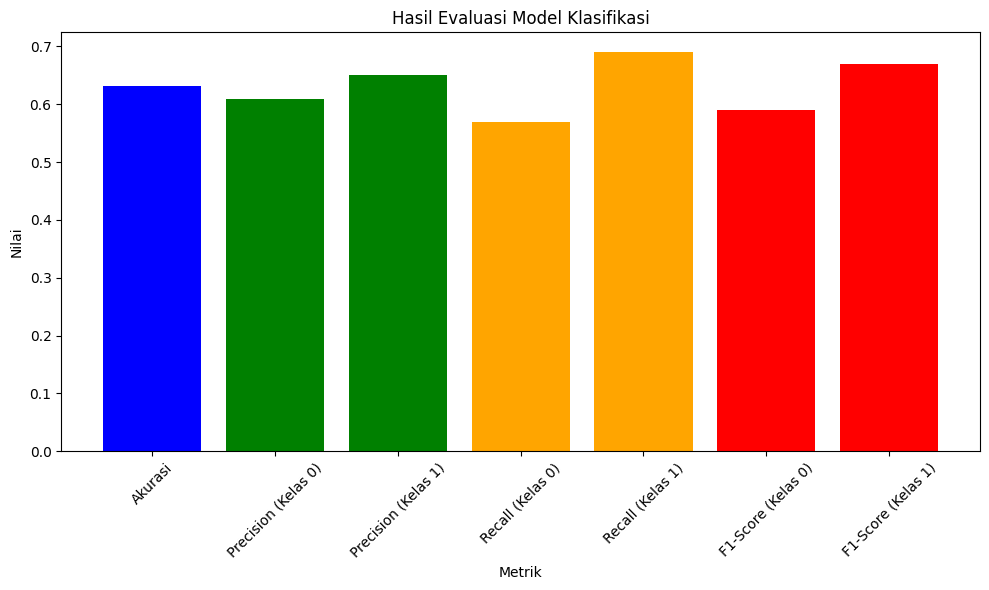

In [19]:
# Data dari report
accuracy = 0.6315623521992748
precision = [0.61, 0.65]
recall = [0.57, 0.69]
f1_score = [0.59, 0.67]

# Membuat grafik batang
plt.figure(figsize=(10, 6))
x = ['Akurasi', 'Precision (Kelas 0)', 'Precision (Kelas 1)', 'Recall (Kelas 0)', 'Recall (Kelas 1)', 'F1-Score (Kelas 0)', 'F1-Score (Kelas 1)']
y = [accuracy] + precision + recall + f1_score
plt.bar(x, y, color=['blue', 'green', 'green', 'orange', 'orange', 'red', 'red'])
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.title('Hasil Evaluasi Model Klasifikasi')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()

In [20]:

# `0` (tidak viral):
#   - Presisi: % dari prediksi konten tidak viral adalah benar.
#   - Recall: % dari konten yang sebenarnya tidak viral terdeteksi dengan benar oleh model.
#   - F1-score: Kombinasi dari presisi dan recall adalah %.
#   - Support: Ada beberapa contoh konten tidak viral dalam set pengujian.

# `1` (viral):
#   - Presisi : % dari prediksi konten viral adalah benar.
#   - Recall: % dari konten yang sebenarnya viral terdeteksi dengan benar oleh model.
#   - F1-score: Kombinasi dari presisi dan recall adalah %.
#   - Support: Ada beberapa contoh konten viral dalam set pengujian.

# - Accuracy (Akurasi): 63% dari semua prediksi model adalah benar.
# - Macro Avg: Rata-rata metrik (presisi, recall, dan F1-score) untuk kedua kelas tanpa memperhitungkan jumlah contoh di setiap kelas.
# - Weighted Avg: Rata-rata metrik yang memperhitungkan jumlah contoh di setiap kelas, memberikan bobot lebih pada kelas dengan lebih banyak contoh.
